# Working with Video Data in Python

This notebook was created for the [YouTube tutorial that you can find here](https://youtu.be/AxIc-vGaHQ0)!!


- What you will learn:
    - What is video data?
    - Converting between video formats
    - Pulling metadata from video file.
    - How to open a video file and extract images using cv2 (openCV).
    - Adding annotations to video frames.
    - Saving edited video.

# What is video data?
Simply put, video data is a series of images that when shown in sucession give the illusion of motion. Like a flipbook!

<img src="https://i.imgur.com/Rx9R3Hf.jpg" width="500" height="500" />




## Video resolution
Video resolution is the size of each image in the video. It doesn't need to be a standard size, but there are common sizes for video.

<img src="https://i.imgur.com/CUo7rGb.png" width="500" height="500" />

## What is frame rate?

Frame rate determines the number of "images" seen per second. Can be described as fps (frames per second) or Hz (general unit for frequency)

<img src="https://i.imgur.com/uSOX932.jpg" width="500" height="500" />

# Getting Setup for working with Video in Python
Packages you'll need installed:
- opencv / cv2 : `pip install opencv-python`
- matplotlib : `pip install matplotlib`
- ffmpeg (for converting videos)

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess

plt.style.use('ggplot')

# Converting video types
Use ffmpeg to convert mov to mp4. Read more in the documentation here: https://ffmpeg.org/ffmpeg.html

In [15]:
input_file = '../../data/image/2.mp4'
file_mp4 = '../../data/image/3.mp4'
subprocess.run(['ffmpeg',
                '-i',
                input_file,
                "-crf",
                "18",
                file_mp4,
                '-loglevel',
                'quiet']
              )

CompletedProcess(args=['ffmpeg', '-i', '../../data/image/2.mp4', '-crf', '18', '../../data/image/3.mp4', '-loglevel', 'quiet'], returncode=0)

In [16]:
!ls -GFlash --color

итого 40M
4,0K drwxrwxr-x 2 maksim 4,0K авг  4 20:24  ./
4,0K drwxrwxrwx 6 maksim 4,0K авг  4 19:11  ../
6,1M -rw-rw-r-- 1 maksim 6,1M авг  4 18:53  DL_10.ipynb
1,4M -rw-rw-r-- 1 maksim 1,4M авг  4 18:54  DL_11.ipynb
2,3M -rw-rw-r-- 1 maksim 2,3M авг  4 19:05  DL_13.ipynb
1,1M -rw-rw-r-- 1 maksim 1,1M авг  4 19:06  DL_14.ipynb
1,4M -rw-rw-r-- 1 maksim 1,4M авг  4 19:07  DL_15_1.ipynb
1,2M -rw-rw-r-- 1 maksim 1,2M авг  4 19:07  DL_15_2.ipynb
1,5M -rw-rw-r-- 1 maksim 1,5M авг  4 19:08  DL_16.ipynb
8,7M -rw-rw-r-- 1 maksim 8,7M авг  4 20:14  DL_19.ipynb
 48K -rw-rw-r-- 1 maksim  48K авг  4 18:21  DL_5.ipynb
132K -rw-rw-r-- 1 maksim 129K авг  4 18:21 'DL_5, part 2.ipynb'
124K -rw-rw-r-- 1 maksim 123K авг  4 17:58 'DL_6. BERT for sentences.ipynb'
 12K -rw-rw-r-- 1 maksim  11K авг  4 17:58 'DL_6. Decoding Strategies.ipynb'
 56K -rw-rw-r-- 1 maksim  53K авг  4 17:58 'DL_6. ViT.ipynb'
5,7M -rw-rw-r-- 1 maksim 5,7M авг  4 18:39  DL_7_Intro_to_OpenCV.ipynb
3,6M -rw-rw-r-- 1 maksim 3,6M авг  4 18

# Display Video in Notebook

In [17]:
ipd.Video(file_mp4, width=700)

# Open the Video and Read Metadata

In [18]:
# Load in video capture
cap = cv2.VideoCapture(file_mp4)

In [19]:
# Total number of frames in video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

182.0

In [20]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 432.0, Width 768.0


In [21]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 25.00


In [22]:
cap.release()

# Pulling in Images from Video

In [23]:
cap = cv2.VideoCapture(file_mp4)
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (432, 768, 3)


In [24]:
## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

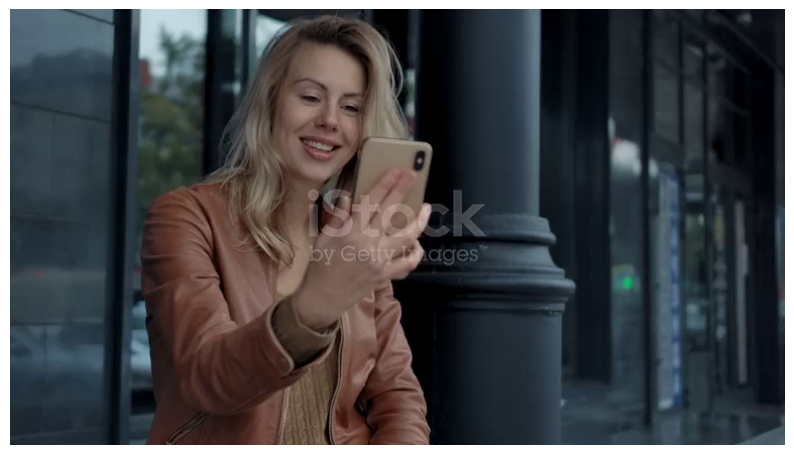

In [25]:
display_cv2_img(img)

In [26]:
cap.release()

# Display multiple frames from the video

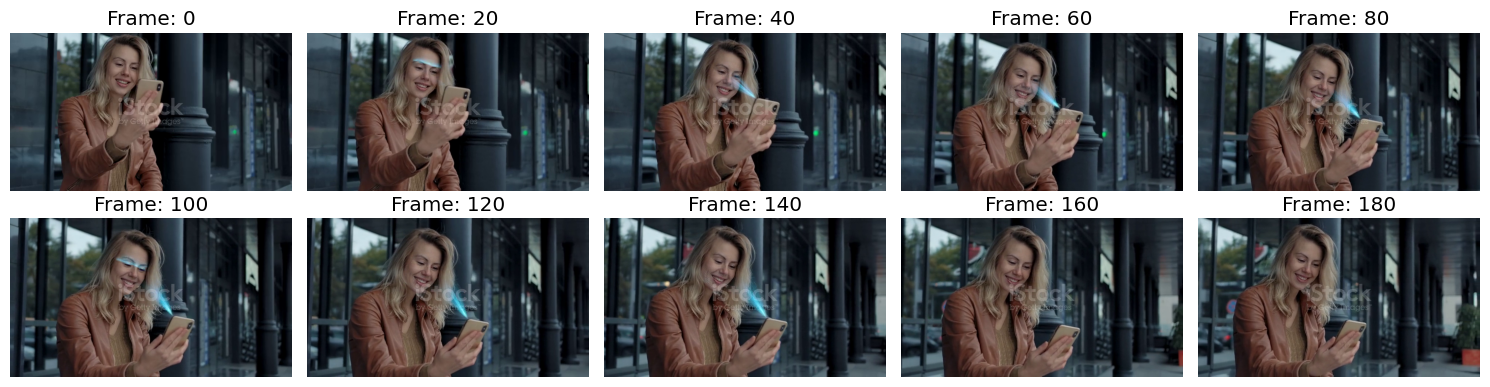

In [37]:
fig, axs = plt.subplots(2, 5, figsize=(15, 4))
axs = axs.flatten()

cap = cv2.VideoCapture(file_mp4)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 20 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

# Add Annotations to Video Images

In [17]:
labels = pd.read_csv('../input/driving-video-with-object-tracking/mot_labels.csv',
                     low_memory=False)
video_labels = (
    labels.query('videoName == "026c7465-309f6d33"').reset_index(drop=True).copy()
)
video_labels["video_frame"] = (video_labels["frameIndex"] * 11.9).round().astype("int")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
video_labels["category"].value_counts()

In [38]:
# Pull frame 1035

cap = cv2.VideoCapture(file_mp4)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame == 1035:
        break
cap.release()

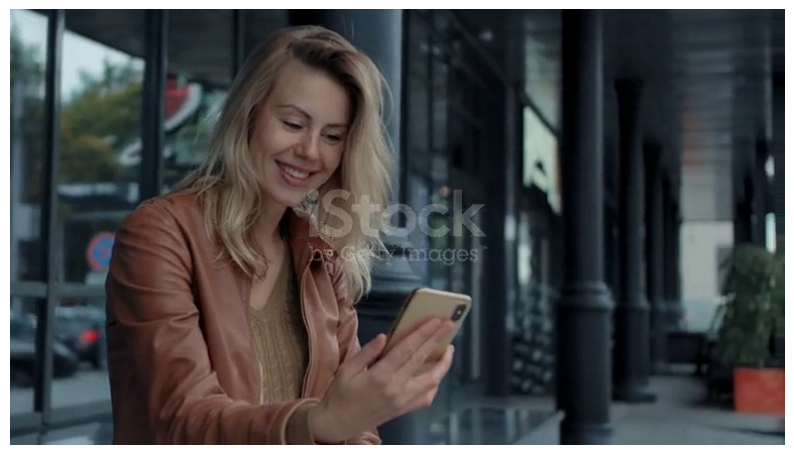

In [ ]:
display_cv2_img(img)

In [40]:
img_example = img.copy()
frame_labels = video_labels.query('video_frame == 1035')
for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    cv2.rectangle(img_example, pt1, pt2, (0, 0, 255), 3)

display_cv2_img(img_example)

NameError: name 'video_labels' is not defined

# Displaying Colored by Category

In [ ]:
color_map = {
    "car": (0, 0, 255),
    "truck": (0, 0, 100),
    "pedestrian": (255, 0, 0),
    "other vehicle": (0, 0, 150),
    "rider": (200, 0, 0),
    "bicycle": (0, 255, 0),
    "other person": (200, 0, 0),
    "trailer": (0, 150, 150),
    "motorcycle": (0, 150, 0),
    "bus": (0, 0, 100),
}

img_example = img.copy()
frame_labels = video_labels.query('video_frame == 1035')
for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    color = color_map[d['category']]
    cv2.rectangle(img_example, pt1, pt2, color, 3)

display_cv2_img(img_example)

## Adding Text

In [ ]:
frame_labels = video_labels.query("video_frame == @frame")
font = cv2.FONT_HERSHEY_TRIPLEX
img_example = img.copy()
for i, d in frame_labels.iterrows():
    pt1 = int(d["box2d.x1"]), int(d["box2d.y1"])
    pt2 = int(d["box2d.x2"]), int(d["box2d.y2"])
    color = color_map[d["category"]]
    img_example = cv2.rectangle(img_example, pt1, pt2, color, 3)
    pt_text = int(d["box2d.x1"]) + 5, int(d["box2d.y1"] + 10)
    img_example = cv2.putText(img_example, d["category"], pt_text, font, 0.5, color)
display_cv2_img(img_example)
cap.release()

# Label and output Annotated Video

In [ ]:
def add_annotations(img, frame, video_labels):
    max_frame = video_labels.query("video_frame <= @frame")["video_frame"].max()
    frame_labels = video_labels.query("video_frame == @max_frame")
    for i, d in frame_labels.iterrows():
        pt1 = int(d["box2d.x1"]), int(d["box2d.y1"])
        pt2 = int(d["box2d.x2"]), int(d["box2d.y2"])
        color = color_map[d["category"]]
        img = cv2.rectangle(img, pt1, pt2, color, 3)
    return img

In [ ]:
!rm -r out_test.mp4

In [ ]:
VIDEO_CODEC = "mp4v"
fps = 59.94
width = 1280
height = 720
out = cv2.VideoWriter("out_test.mp4",
                cv2.VideoWriter_fourcc(*VIDEO_CODEC),
                fps,
                (width, height))

cap = cv2.VideoCapture("026c7465-309f6d33.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

for frame in tqdm(range(n_frames), total=n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    img = add_annotations(img, frame, video_labels)
    out.write(img)
out.release()
cap.release()

In [ ]:
!ls -GFlash -color

# Convert our labeled output to mp4 and view

In [ ]:
!rm out_test_compressed.mp4

In [ ]:
tmp_output_path = "out_test.mp4"
output_path = "out_test_compressed.mp4"
subprocess.run(
    [
        "ffmpeg",
        "-i",
        tmp_output_path,
        "-crf",
        "18", 
        "-preset",
        "veryfast",
        "-vcodec",
        "libx264",
        output_path,
        '-loglevel',
        'quiet'
    ]
)

In [ ]:
!ls -GFlash --color

In [ ]:
ipd.Video('out_test_compressed.mp4', width=600)

In [ ]:
!pip install ultralytics

In [ ]:
!wget https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n.pt

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")  # load an official model

VIDEO_CODEC = "mp4v"
fps = 59.94
width = 1280
height = 720
out = cv2.VideoWriter("out_predict.mp4",
                cv2.VideoWriter_fourcc(*VIDEO_CODEC),
                fps,
                (width, height))

cap = cv2.VideoCapture("026c7465-309f6d33.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

for frame in tqdm(range(n_frames), total=n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    results = model(img, verbose=False)[0]

    for result in results.boxes:
        xyxy = result.xyxy[0]  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
        pt_1 = (int(xyxy[0]), int(xyxy[1]))
        pt_2 = (int(xyxy[2]), int(xyxy[3]))
        img = cv2.rectangle(img, pt_1, pt_2, (0, 0, 255), 3)
    out.write(img)
out.release()
cap.release()

In [ ]:
!rm out_predict_compressed.mp4

In [ ]:
tmp_output_path = "out_predict.mp4"
output_path = "out_predict_compressed.mp4"
subprocess.run(
    [
        "ffmpeg",
        "-i",
        tmp_output_path,
        "-crf",
        "18", 
        "-preset",
        "veryfast",
        "-vcodec",
        "libx264",
        output_path,
        '-loglevel',
        'quiet'
    ]
)

In [ ]:
ipd.Video('out_predict_compressed.mp4', width=600)

# The End